# 17. 난 스케치를 할테니 너는 채색을 하거라

2014년 GAN(Generative Adverarial Networks)이 세상에 나타난 이후, computer vision 및 다양한 분야에서 관심을 받아 활발하게 응용되면서 발전했다.   
이미지 생성 모델로 사용되는 일반적인 GAN에 조건을 부여하여 내가 원하는 유형의 이미지를 생성해낼 수 있도록 알아보자.

# 17-2. 조건 없는 생성 모델(Unconditional Generative Model), GAN

![](https://d3s0tskafalll9.cloudfront.net/media/images/mnist_results.max-800x600.png)

GAN을 이용해 MNIST, CIFAR-10 등의 데이터셋을 생성하는 과정을 생각해보자.

'7'이라는 이미지를 만들고자 MNIST 데이터셋을 이용해 GAN을 학습시켰다. 학습이 완료된 모델을 이용해서 '7'이라 쓰여있는 이미지를 얻기 위해 어떤 방법을 이용해야할까?

여기서 할 수 있는 방법은 다양한 노이즈를 계속 입력하며 '7'이라는 숫자 이미지가 생성되길 기다리는 것이다. 운이 좋다면 한번에 나오겠지만, 운이 없다면 100개가 넘는 이미지를 생성해도 안나올 수 있다.   
또한 '7' 이미지를 수만 개 만들어야 한다면, 상상만으로도 끔찍하다.

이렇게 잘 학습된 GAN을 이용해 실제 이미지를 생성할 때 답답한 점이 하나 있다면, 내가 원하는 종류의 이미지를 바로 생성해내지 못한다.   
다시말해 일반적인 GAN과 같은 unconditioned generative model은 내가 생성하고자 하는 데이터에 대해 제어하기 힘들다.

그래서 이를 해결하기 위해, 원하는 이미지를 바로 생성해내기 위해 어떤 방법을 이용해야 할까?

# 17-3. 조건 있는 생성 모델(Conditional Generative Model), cGAN

__Conditional Generative Adversarial Nets(cGAN)__은 내가 원하는 종류의 이미지를 생성하고자 할 때 GAN이 가진 생성 과정의 불편함을 해소하여, 내가 원하는 종류의 이미지를 생성할 수 있도록 고안된 방법이다.

### GAN의 목적 함수

먼저 GAN에 대해 간단히 복습해보자. GAN 구조는 Generator 및 Discriminator라 불리는 두 신경망이 minmax game을 통해 서로 경쟁하며 발전한다.   

$min_Gmax_DV(D,G) = E_{x-Pdata(x)}[logD(x)]+E_{z~p_z(z)[log(1-D(G(z)))]}$

다음과 같은 식으로 표현할 수 있는데 Generator는 이를 최소화하려, Discriminator는 이를 최대화하려 학습한다.   
$z$는 임의 노이즈를, $D, G$는 각각 Discriminator, Generator를 의미한다.

$D$인 Discriminator 입장에서 식을 해석해보자.   
실제 이미지를 1, 가짜 이미지를 0으로 두었을 때 $D$는 이 식을 최대화해야하며, 우변의 +를 기준으로 양쪽의 항 $(logD(x))$ 및 $log(1-D(G(z)))$이 모두 최대가 되게 해야한다.   
$D(x)$는 1이 되도록, $D(G(z))$는 0이 되도록 해야한다.   

다시 말해, 진짜 데이터 $(x)$를 진짜로, 가짜 데이터 $(G(z))$를 가짜로 정확히 예측하도록 학습해야한다.

이번에는 $G$인 Generator 입장에서 식을 해석해보자.   
$D$와 반대로 $G$는 위 식을 최소화해야 하고, 위 수식의 마지막 항 $log(1-D(G(z)))$만 최소화하면 된다.(우변의 첫번째 항은 G와 관련이 없다.)   
이를 최소화한다는 것은 log 내부가 0이 되도록 해야함을 뜻하며, $D(G(z))$가 1이 되도록 해야한다.   

$G$는 $z$를 입력받아 생성한 데이터 $G(z)$를 $D$가 진짜 데이터라고 예측할 만큼 진짜 같은 가짜 데이터를 만들도록 학습해야한다.

### cGAN의 목적 함수
$min_Gmax_DV(D,G)=E_{x~Pdata(x)}[logD(x|y)]+E_{z~P_z(z)[log(1-D(G(z|y)))]}$


GAN의 수식과 비교하면 $D(x)$가 $D(x|y)$로, $G(z)$가 $G(z|y)$로 바꼈다.   
이는 G와 D의 입력에 특정 조건을 나타내는 정보인 $y$를 같이 입력한다는 의미로, $y$를 추가로 입력받아 $G$ 입장에서는 식을 최소화하고, $D$ 입장에서는 식을 최대화하도록 학습한다.

여기서 $y$는 어떤 정보여도 상관이 없다. MNIST 데이터셋을 학습시키는 경우 $y$는 0~9까지의 label 정보가 된다.   
Generator가 노이즈 $z$를 입력받았을 때, 특정 조건 $y$가 함께 입력되기 때문에, $y$를 통해 $z$를 어떠한 이미지로 만들어야할지 방향을 제어할 수 있는 가이드 역할을 한다.

### 그림으로 이해하기
GAN과 cGAN의 feed forward 과정을 그림으로 비교해보자.   

##### GAN
![](https://d3s0tskafalll9.cloudfront.net/media/images/gan_img.max-800x600.png)

Generator를 보면 파란색 노이즈($z$)가 입력되고, 검정색 특정 representation으로 변환 후, 가짜 데이터 빨간색 $G(z)$를 생성한다.

Discriminator는 파란색 실제 데이터 $x$와 generator가 생성한 가짜 데이터 $G(z)$를 입력받아 검정색을 만들고 보라색 $D(x)$ 및 $D(G(z))$를 계산하여 진짜와 가짜를 식별한다.

##### cGAN
![](https://d3s0tskafalll9.cloudfront.net/media/images/cgan_img.max-800x600.png)

$y$ 정보를 담고 있는 초록색이 추가되었다.   
Generator 부분을 먼저 확인해보자.   
파란색 노이즈 $z$와 초록색 추가 정보 $y$를 함께 입력 받아 결합되어 검정색 representation으로 변환되어 가짜 데이터 $G(z|y)$가 생성되었다. MNIST, CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 $y$는 레이블 정보이며, 일반적으로 one-hot 벡터를 입력으로 넣는다.

Discriminator 부분을 확인해보자.   
파란색 실제 데이터 $x$, generator가 생성한 핑크색 $G(z|y)$를 각각 입력받는다. $y$ 정보도 함께 입력되어 진짜와 가짜를 식별한다. MNIST나 CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 실제 데이터 $x$, $y$는 알맞은 한 쌍을 이뤄야하며, 마찬가지로 Generator에 입력된 $y$와 $Discriminator$에 입력되는 $y$는 동일한 레이블이여야한다.

# 17-4. 내가 원하는 숫자 이미지 만들기 (1) Generator 구성하기

GAN, cGAN을 각각 간단하게 구현하고 실험해보자. 데이터셋은 MNIST를 사용한다.   
- [TF2-GAN](https://github.com/thisisiron/TF2-GAN)

### 데이터 준비하기
tensorflow-dataset 라이브러리를 통해 데이터를 불러오자.

In [1]:
! pip list | grep tensorflow-dataset

tensorflow-datasets           4.0.1


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


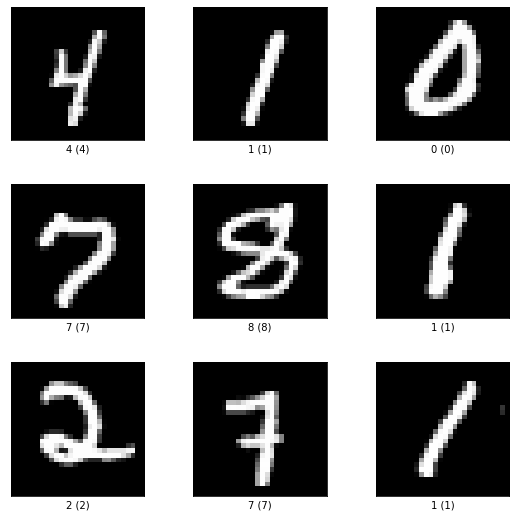

In [2]:
import tensorflow_datasets as tfds

mnist, info =  tfds.load(
    "mnist", split="train", with_info=True
)

fig = tfds.show_examples(mnist, info)

여러개의 숫자 이미지와 그에 알맞는 레이블이 출력되었다. 이들을 학습 전에 필요한 몇 가지 전처리를 진행하자.   
이미지 픽셀 값을 -1~1 사이의 범위로 변경하고, 레이블 정보를 원-핫 인코딩으로 바꾸자.

In [3]:
import tensorflow as tf

BATCH_SIZE = 128

def gan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

def cgan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    
    label = tf.one_hot(data["label"], 10)
    return image, label

gan_datasets = mnist.map(gan_preprocessing).shuffle(1000).batch(BATCH_SIZE)
cgan_datasets = mnist.map(cgan_preprocessing).shuffle(100).batch(BATCH_SIZE)
print("✅")

✅


유도한 픽셀 값의 범위와, 원-핫 인코딩 레이블 정보를 제대로 적용했는지 확인해보자.

Label : tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)
Image Min/Max : -1.0 1.0


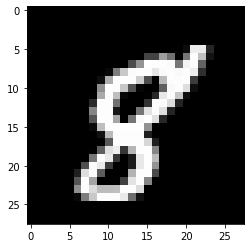

In [4]:
import matplotlib.pyplot as plt

for i,j in cgan_datasets : break

# 이미지 i와 라벨 j가 일치하는지 확인해 봅니다.     
print("Label :", j[0])
print("Image Min/Max :", i.numpy().min(), i.numpy().max())
plt.imshow(i.numpy()[0,...,0], plt.cm.gray)

### GAN Generator 구성하기

tensorflow2의 subclassing 방법을 이용해보자. Subclassing 방법은 tensorflow.keras.Model을 상속받아 클래스를 만들며, 일반적으로 `__init__()` 메서드 안에서 레이어 구성을 정의하고, 구성된 레이어를 `call()` 메서드에 사용해 forward propagation을 진행한다. 이러한 Subclassing 방법은 Pytorch의 모델 구성방법과 매우 유사하다.   

먼저 GAN의 Generator를 구현해보자.

In [5]:
from tensorflow.keras import layers, Input, Model

class GeneratorGAN(Model):
    def __init__(self):
        super(GeneratorGAN, self).__init__()

        self.dense_1 = layers.Dense(128, activation='relu')
        self.dense_2 = layers.Dense(256, activation='relu')
        self.dense_3 = layers.Dense(512, activation='relu')
        self.dense_4 = layers.Dense(28*28*1, activation='tanh')

        self.reshape = layers.Reshape((28, 28, 1))

    def call(self, noise):
        out = self.dense_1(noise)
        out = self.dense_2(out)
        out = self.dense_3(out)
        out = self.dense_4(out)
        return self.reshape(out)

print("✅")

✅


`__init__()` 메서드 안에 사용할 레이어를 모두 정의했다. 4개의 FC 레이어 중 한 개를 제외하고 모두 relu로 활성화했다.   
`call()` 메서드에서는 노이즈를 입력받아 `__init__()`에서 정의한 레이어들을 순서대로 통과한다.   
Generator는 숫자가 쓰인 이미지를 출력해야 하므로 마지막 출력은 `layers.Reshape((28,28,1))` 크기로 변환했다.

### cGAN Generator 구성하기

In [6]:
class GeneratorCGAN(Model):
    def __init__(self):
        super(GeneratorCGAN, self).__init__()
        
        self.dense_z = layers.Dense(256, activation='relu')
        self.dense_y = layers.Dense(256, activation='relu')
        self.combined_dense = layers.Dense(512, activation='relu')
        self.final_dense = layers.Dense(28 * 28 * 1, activation='tanh')
        self.reshape = layers.Reshape((28, 28, 1))

    def call(self, noise, label):
        noise = self.dense_z(noise)
        label = self.dense_y(label)
        out = self.combined_dense(tf.concat([noise, label], axis=-1))
        out = self.final_dense(out)
        return self.reshape(out)
    
print("✅")

✅


GAN의 generator보다 복잡해보이지만, 크게 다르지 않다.   
노이즈 $z$와 라벨 $y$를 입력받아 FC레이어와 relu 활성화 함수를 통과한다. 이들이 연결(combine)되어 FC레이어와 relu를 통과한다. 그리고 이들이 28x28x1 차원의 형태로 FC하고 tanh를 거쳐 `layers.Reshape((28, 28, 1))` 형태로 변환하여 출력한다.

이렇게 임의 노이즈 및 레이블 정보로부터 숫자 이미지를 생성하는 Generator를 구현했다.

# 17-5. 내가 원하는 숫자 이미지 만들기 (2) Discriminator 구성하기

### GAN Discriminator 구성하기

실제 이미지와 Generator가 생성한 이미지에 대해 진짜와 가짜를 식별하는 Discriminator를 구현해보자.

먼저 GAN부터 만들어보자.

In [7]:
class DiscriminatorGAN(Model):
    def __init__(self):
        super(DiscriminatorGAN, self).__init__()
        self.flatten = layers.Flatten()
        
        self.blocks = []
        for f in [512, 256, 128, 1]:
            self.blocks.append(
                layers.Dense(f, activation=None if f==1 else "relu")
            )
        
    def call(self, x):
        x = self.flatten(x)
        for block in self.blocks:
            x = block(x)
        return x
    
print("✅")

✅


`__init__()`에 `blocks`라는 리스트를 만든다음 for loop를 이용하여 필요한 레이어들을 차곡차곡 쌓았다. 이러한 방식을 이용하면 각각의 fully-connected 레이어를 매번 정의하지 않아도 되므로 많은 레이어가 필요할 때 편리하다.   
Discriminator의 입력은 Generator가 생성한 (28,28,1) 크기의 이미지이며, 이를 fully-connected 레이어로 학습하기 위해 `call()`에서 가장 먼저 `layers.Flatten()`이 적용된다.   
그리고 레이어들이 쌓여있는 `blocks`에 대해 for loop를 이용하여 레이어들을 순서대로 하나씩 꺼내 입력 데이터를 통과시킨다. 마지막 fully-connected 레이어를 통과하면 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력된다.

### cGAN Discriminator 구성하기

cGAN의 discriminator는 `Maxout`이라는 특별한 레이어가 사용된다. 이를 간단하게 설명하면 두 레이어 사이를 연결할 때, 여러개의 FC 레이어를 통과시켜 그 중 가장 큰 값을 가져오도록 한다. 2개의 FC 레이어를 사용할 때 `Maxout`을 식으로 표현하면 다음과 같다.   
$max(w_1^Tx+b_1, w_2^Tx+b_2$)$   
![](https://d3s0tskafalll9.cloudfront.net/media/images/e-25-4-1.max-800x600.png)

이렇게 fully-connected 레이어를 2개만 사용한다면 다차원 공간에서 2개의 면이 교차된 모양의 activation function 처럼 작동한다. 

사용하는 FC 레이어 개수가 늘어나면 점점 곡선 형태인 activation function이 될 수 있다.   
![](https://d3s0tskafalll9.cloudfront.net/media/original_images/e-25-4-2.png)

`Maxout`을 구성해보자. 이전 모델을 정의한 것과 비슷하게 `__init__()`, `call()` 메서드를 구성한다.

In [8]:
class Maxout(layers.Layer):
    def __init__(self, units, pieces):
        super(Maxout, self).__init__()
        self.dense = layers.Dense(units*pieces, activation="relu")
        self.dropout = layers.Dropout(.5)    
        self.reshape = layers.Reshape((-1, pieces, units))
    
    def call(self, x):
        x = self.dense(x)
        x = self.dropout(x)
        x = self.reshape(x)
        return tf.math.reduce_max(x, axis=2)

print("✅")

✅


Maxout 레이어를 구성할 때 units, pieces의 설정이 필요하며, units 차원 수를 가진 FC 레이어를 pieces 개수만큼 만들고 그 중 최댓값을 출력한다.   
예를들어, 사용할 Maxout 레이어가 units=100, pieces=10 으로 설정한다면 입력으로부터, 100차원의 representation을 10개 만들고, 10개 중 최댓값을 가져와 최종 1개의 100차원 representation이 출력된다. 이를 수식으로 표현하면 다음과 같다.   

$max(w_1^Tx+b1, w_2^Tx+b2, ..., w_9^Tx+b_9, w_10^Tx+b10$   

Maxout 레이어를 3번만 사용하면 cGAN의 Discriminator를 구성할 수 있다.

In [9]:
class DiscriminatorCGAN(Model):
    def __init__(self):
        super(DiscriminatorCGAN, self).__init__()
        self.flatten = layers.Flatten()
        
        self.image_block = Maxout(240, 5)
        self.label_block = Maxout(50, 5)
        self.combine_block = Maxout(240, 4)
        
        self.dense = layers.Dense(1, activation=None)
    
    def call(self, image, label):
        image = self.flatten(image)
        image = self.image_block(image)
        label = self.label_block(label)
        x = layers.Concatenate()([image, label])
        x = self.combine_block(x)
        return self.dense(x)
    
print("✅")

✅


generator가 생성한 (28, 28, 1) 크기의 이미지가 입력되므로, `layers.Flatten()`이 적용된다. 그리고 이미지 입력 및 레이블 입력 각각은 `Maxout` 레이어를 한 번씩 통과한 후 서로 결합되어 `Maxout` 레이어를 한 번 더 통과한다. 마지막 FC 레이어를 통과하면 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력된다.

# 17-6. 내가 원하는 숫자 이미지 만들기 (3) 학습 및 테스트하기

Generator, Discriminator를 이용해 MNIST를 학습하고 각 모델로 직접 숫자 손글씨를 생성해보자.   


# 17-7. GAN의 입력에 이미지를 넣는다면? Pix2Pix

# 17-8. 난 스케치를 할 테니 너는 채색을 하거라 (1) 데이터 준비하기

# 17-9. 난 스케치를 할 테니 너는 채색을 하거라 (2) Generator 구성하기

# 17-10. 난 스케치를 할 테니 너는 채색을 하거라 (3) Generator 재구성하기

# 17-11. 난 스케치를 할 테니 너는 채색을 하거라 (4) Discriminator 구성하기

# 17-12. 난 스케치를 할 테니 너는 채색을 하거라 (5) 학습 및 테스트하기

# 17-13. 프로젝트 : Segmentation map으로 도로 이미지 만들기